In [8]:
library(dplyr)
library(ggplot2)

In [3]:
df_obs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/adata_obs_pseudocells_DA.csv", row.names=1)
df_obs$pseudocell = paste0(df_obs$donor_id,"--",df_obs$celltype,"--",df_obs$Condition,"--",df_obs$leiden_res_34_euclidean)

In [4]:
head(df_obs)

donor_id         celltype time_point treatment Condition
0 HPSI0714i-iudw_1 DA       D30        NONE      d30      
1 HPSI0714i-iudw_1 DA       D30        NONE      d30      
2 HPSI0714i-iudw_1 DA       D30        NONE      d30      
3 HPSI0714i-iudw_1 DA       D30        NONE      d30      
4 HPSI0714i-iudw_1 DA       D30        NONE      d30      
5 HPSI0714i-iudw_1 DA       D30        NONE      d30      
  leiden_res_34_euclidean Number_of_cells
0 0                       26             
1 1                       25             
2 2                       24             
3 3                       21             
4 4                       21             
5 5                       21             
  cell_ids                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [5]:
df_cell_to_pseudocell = data.frame()
for (i in 1:nrow(df_obs)){
    pseudocell = as.character(df_obs[i,"pseudocell"])
    df_obs_sel = df_obs[df_obs$pseudocell == pseudocell,]
    if (nrow(df_obs_sel)==0){next}
    cells = gsub("_d.*","",gsub("\\'","",gsub("\\[","",unlist(strsplit(as.character(df_obs_sel$cell_ids),",")))))
    df_curr = data.frame(pseudocell = pseudocell, cell = gsub(" ","",cells))
    df_cell_to_pseudocell = rbind(df_cell_to_pseudocell, df_curr)
}

In [6]:
nrow(df_cell_to_pseudocell)
head(df_cell_to_pseudocell,2)

[1] 147933

pseudocell,cell
HPSI0714i-iudw_1--DA--d30--0,AACACGTAGTTATCGC-1-0
HPSI0714i-iudw_1--DA--d30--0,AACGTTGGTCTAAAGA-1-0


In [7]:
df_cell_to_pseudocell$donor = gsub("--.*","",df_cell_to_pseudocell$pseudocell)
head(df_cell_to_pseudocell,2)

pseudocell,cell,donor
HPSI0714i-iudw_1--DA--d30--0,AACACGTAGTTATCGC-1-0,HPSI0714i-iudw_1
HPSI0714i-iudw_1--DA--d30--0,AACGTTGGTCTAAAGA-1-0,HPSI0714i-iudw_1


In [9]:
write.csv(df_cell_to_pseudocell, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/cells_pseudocells_donors_mapping.csv")

In [5]:
length(unique(df_cell_to_pseudocell$pseudocell))

[1] 8648

In [6]:
length(unique(df_cell_to_pseudocell$cell))

[1] 147801

In [9]:
df_n = df_cell_to_pseudocell %>% group_by(pseudocell) %>% summarise(n_cells = n())
head(df_n)

pseudocell,n_cells
HPSI0714i-iudw_1--DA--d30--0,26
HPSI0714i-iudw_1--DA--d30--1,25
HPSI0714i-iudw_1--DA--d30--2,24
HPSI0714i-iudw_1--DA--d30--3,21
HPSI0714i-iudw_1--DA--d30--4,21
HPSI0714i-iudw_1--DA--d30--5,21


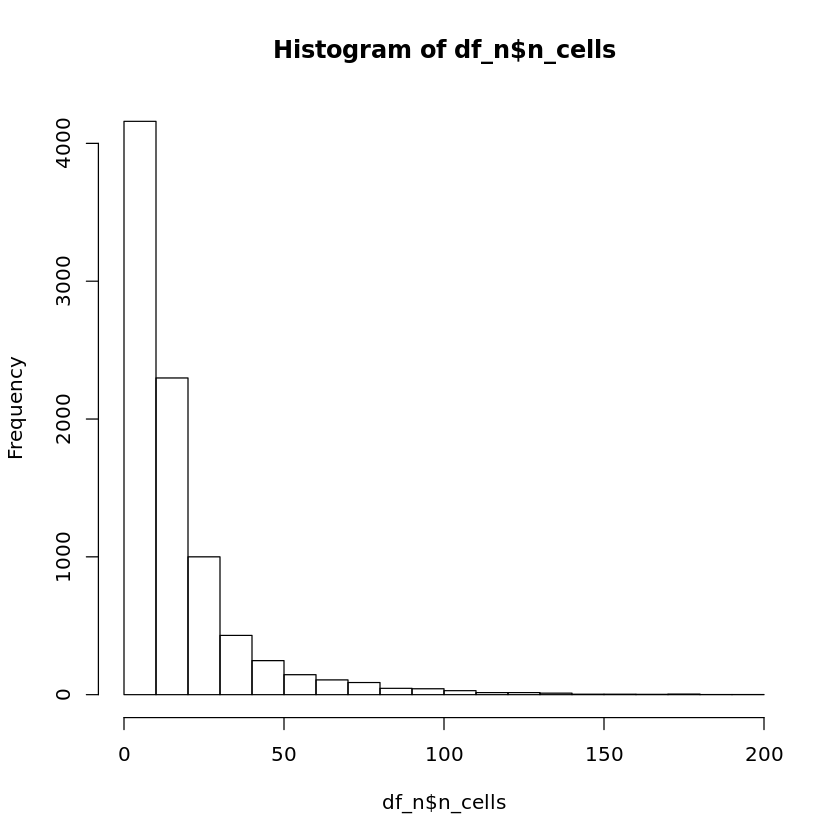

In [10]:
hist(df_n$n_cells)

In [11]:
min(df_n$n_cells)
max(df_n$n_cells)
mean(df_n$n_cells)

[1] 1

[1] 200

[1] 17.10604

In [14]:
df_n = df_cell_to_pseudocell %>% group_by(donor) %>% summarise(n_cells = n())
head(df_n)

donor,n_cells
HPSI0114i-bezi_3,218
HPSI0114i-eipl_1,299
HPSI0114i-fikt_3,67
HPSI0114i-kolf_2,1184
HPSI0114i-lexy_2,198
HPSI0114i-posc_1,167


In [15]:
min(df_n$n_cells)
max(df_n$n_cells)
mean(df_n$n_cells)

[1] 21

[1] 9203

[1] 770.4844